In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib
from distutils.version import LooseVersion

# Data1

`Visualize the data in the x-y coordinate: Draw the distribution of data in x-y coordinate with different shape and colors. Use import matplotlib.pyplot as plt and plt.scatter function. Use plt.xlim and plt.ylim functions. Add a legend.`

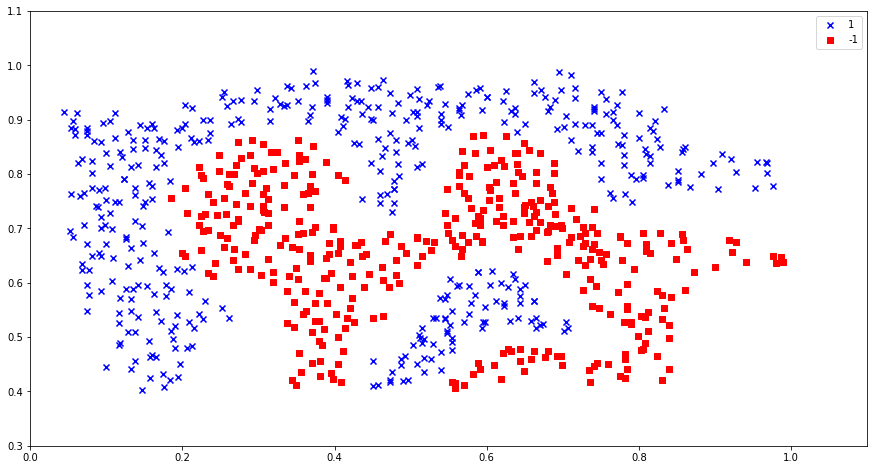

In [2]:
#load data
data1 = pd.read_csv("https://raw.githubusercontent.com/atreish/AIM_5005_Machine_Learning/main/data1.txt", header=None, delim_whitespace=True, names=['label','x','y'])
data2 = pd.read_csv("https://raw.githubusercontent.com/atreish/AIM_5005_Machine_Learning/main/data2.txt", header=None, delim_whitespace=True, names=['label','x','y'])

#plot data
plt.figure(figsize=(15,8))
plt.scatter(data1[data1.label == 1]['x'], data1[data1.label == 1]['y'], c='b', marker='x', label='1')
plt.scatter(data1[data1.label == -1]['x'], data1[data1.label == -1]['y'], c='r', marker='s', label='-1')
plt.xlim([0, 1.1])
plt.ylim([0.3, 1.1])
plt.legend(loc='upper right')
plt.show()

`Train your classifier using Support Vector Machine (SVM) with Radial Basis Function (RBF) and visualize it:
Use Gamma values including 0.1, 1, 100, 1000 differently for your training. For each gamma value, draw a decision region using def plot_decision_regions(X,y,classifier, test_idx=None, resolution0.02) function given in the class. Use a loop to show 5 different drawings according to 5 Gamma values.`

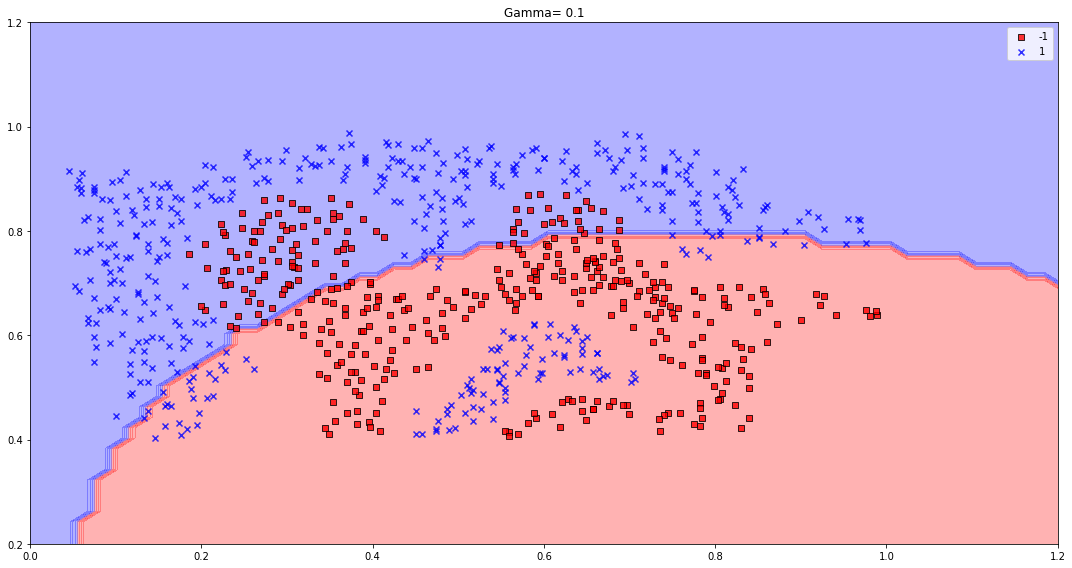

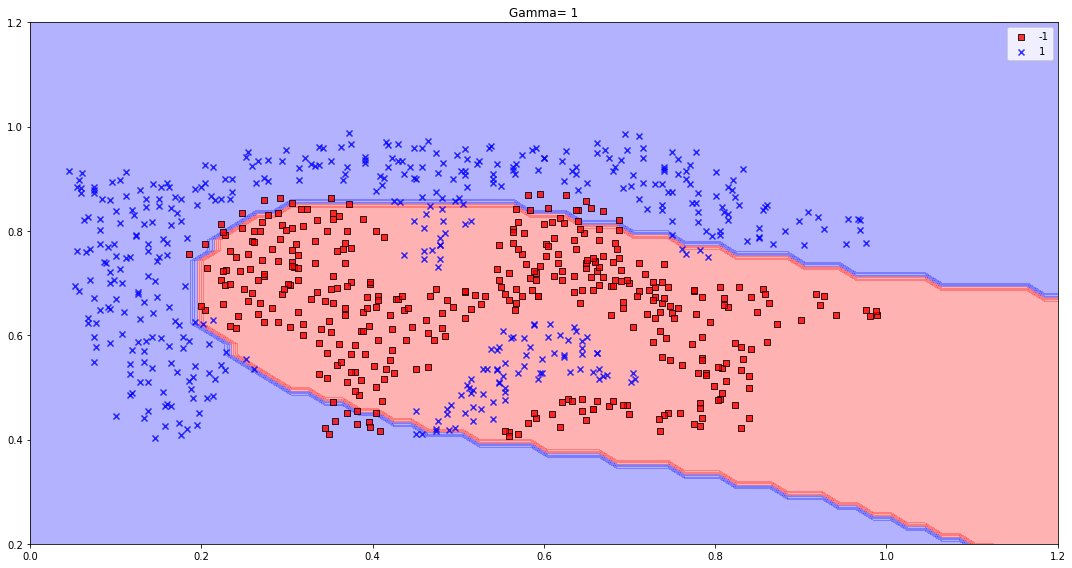

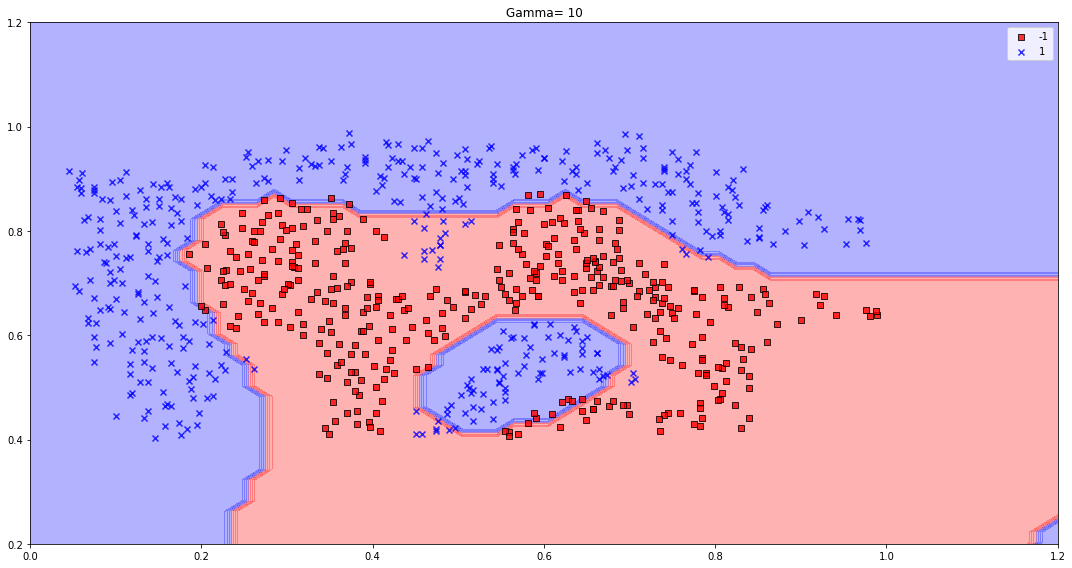

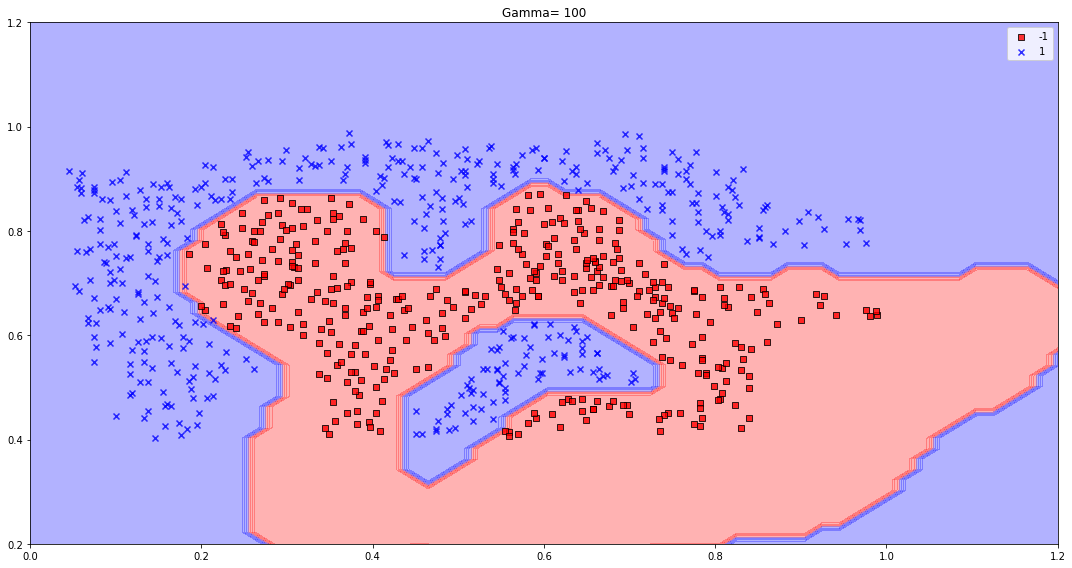

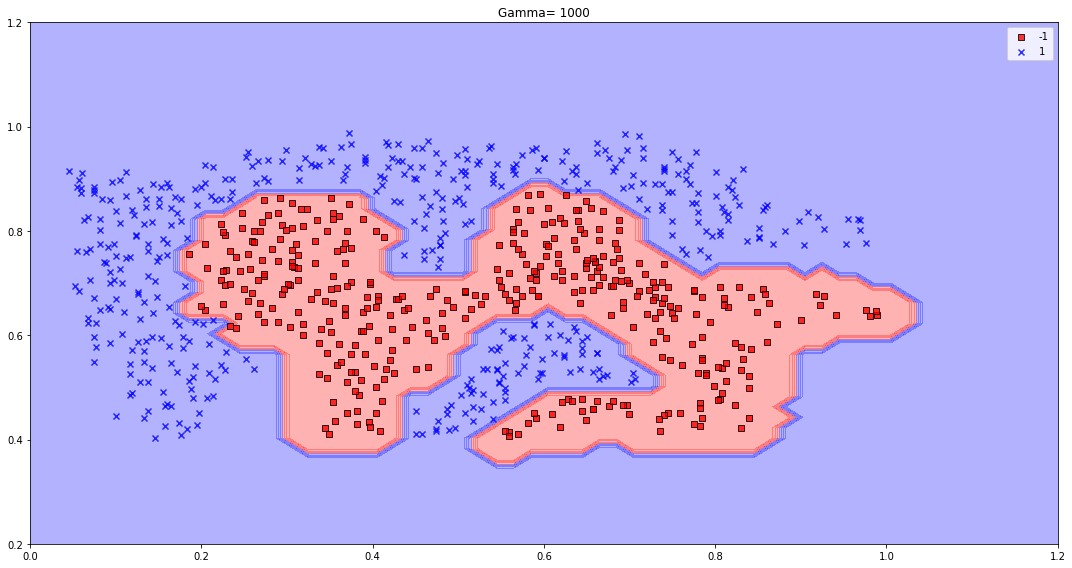

In [3]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], 
                    label=cl,edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black',alpha=1.0, 
                        linewidth=1, marker='o',s=100, label='test set')
        else:
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', 
                        alpha=1.0, linewidth=1, marker='o', s=100, label='test set')   

# plot and train data in different gamma
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10)
    svm.fit(np.array(data1[['x','y']]), np.array(data1['label']))
    plt.figure(figsize=(15,8))
    plot_decision_regions(np.array(data1[['x','y']]), np.array(data1['label']), classifier=svm) 
    plt.title(f'Gamma= {gamma}')
    plt.xlim([0, 1.2])
    plt.ylim([0.2, 1.2])
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

`Divide data into the first 90% of data as training dataset and the last 10% of data as test dataset in the code. Train your classifier with the training data and shows decision regions for the test data indicated by the circle shape as well as for the training data in the plot of decision regions. If you are able to print out the accuracy for the test data according to 5 different gamma values when you trained your classifiers, you will get additional 5 points of bonus.`

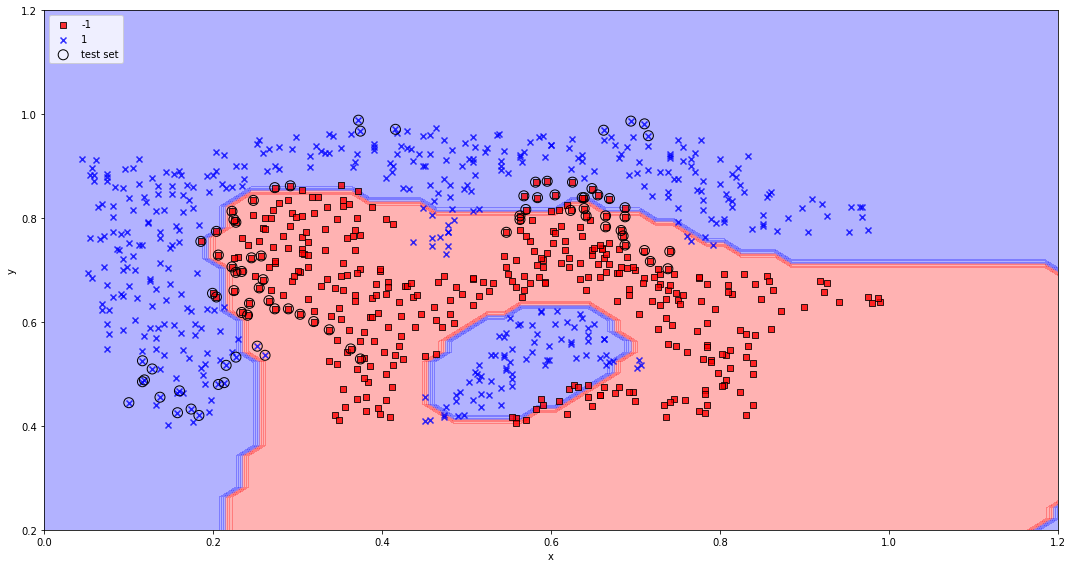

Gamma=0.1,  Accuracy= 0.25925925925925924

Gamma=1,  Accuracy= 0.6666666666666666

Gamma=10,  Accuracy= 0.7530864197530864

Gamma=100,  Accuracy= 0.7777777777777778

Gamma=1000,  Accuracy= 0.7777777777777778



In [4]:
# Splitting data into 90% training and 10% test data:
X_train = np.array(data1[:729][['x','y']])
y_train = np.array(data1[:729]['label'])
svm = SVC(kernel='rbf', random_state=1, gamma=10, C=10)
svm.fit(X_train, y_train)

# draw testing and training data in the gragh
plt.figure(figsize=(15,8))
plot_decision_regions(np.array(data1[['x','y']]), np.array(data1['label']),
                      classifier=svm, test_idx=range(data1[729:].index[0], len(data1)))
plt.xlim([0, 1.2])
plt.ylim([0.2, 1.2])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# predict test data and get the accuracy
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10)
    svm.fit(X_train, y_train)
    predicted  = svm.predict(data1[730:][['x','y']])
    # get the accuracy
    y_test = data1[730:]['label']
    print(f'Gamma={gamma},  Accuracy= {accuracy_score(y_test, predicted)}\n')

# Data2

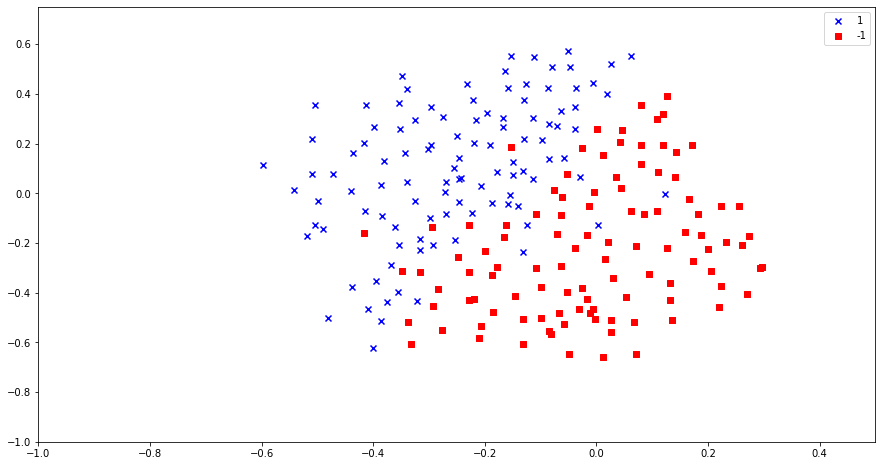

In [5]:
#load data
data2 = pd.read_csv("https://raw.githubusercontent.com/atreish/AIM_5005_Machine_Learning/main/data2.txt", header=None, delim_whitespace=True, names=['label','x','y'])

#plot data
plt.figure(figsize=(15,8))
plt.scatter(data2[data2.label == 1]['x'], data2[data2.label == 1]['y'], c='b', marker='x', label='1')
plt.scatter(data2[data2.label == -1]['x'], data2[data2.label == -1]['y'], c='r', marker='s', label='-1')
plt.xlim([-1, 0.5])
plt.ylim([-1, 0.75])
plt.legend(loc='upper right')
plt.show()

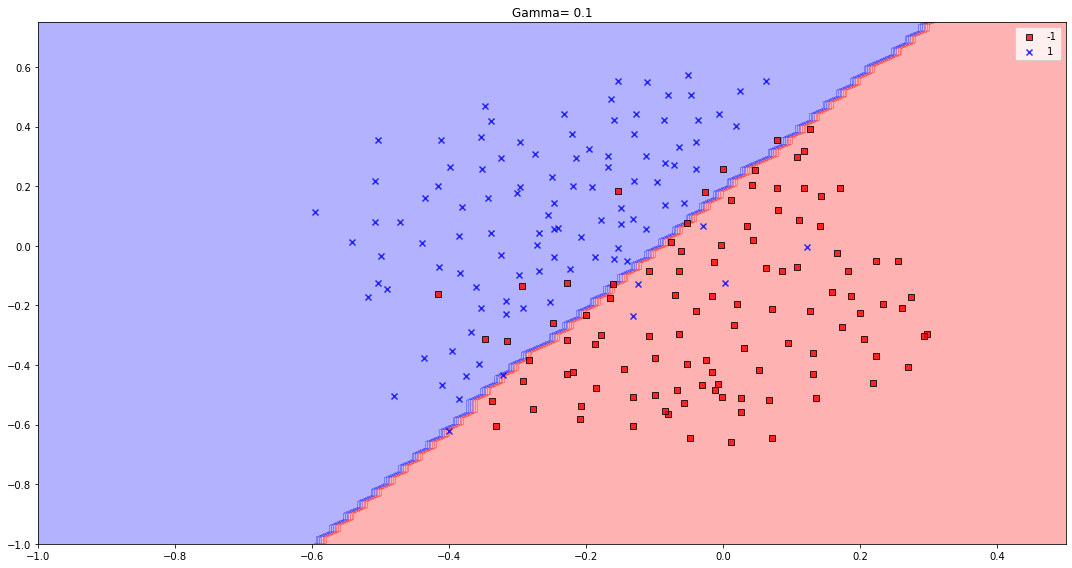

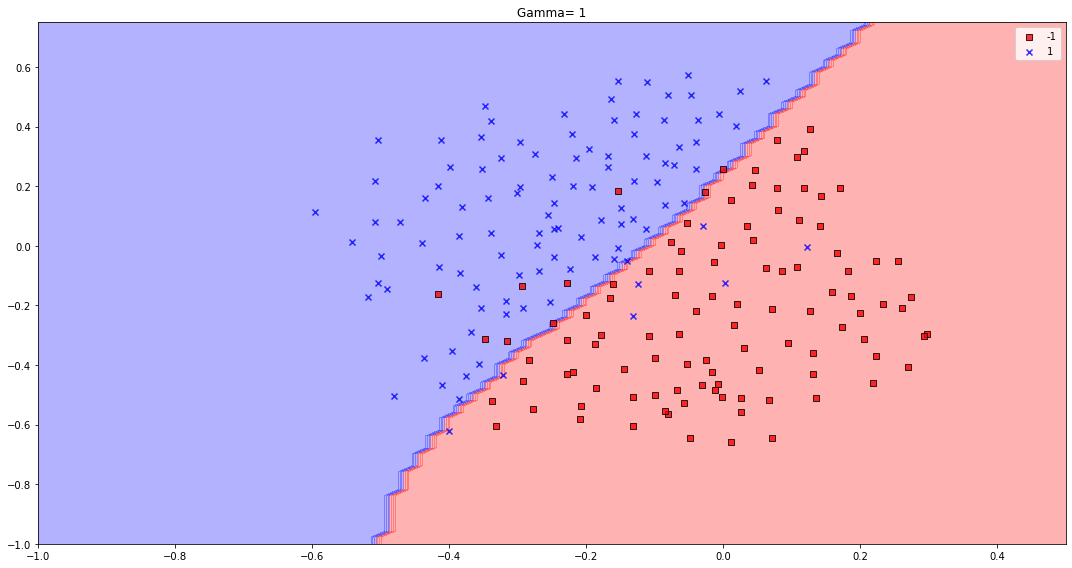

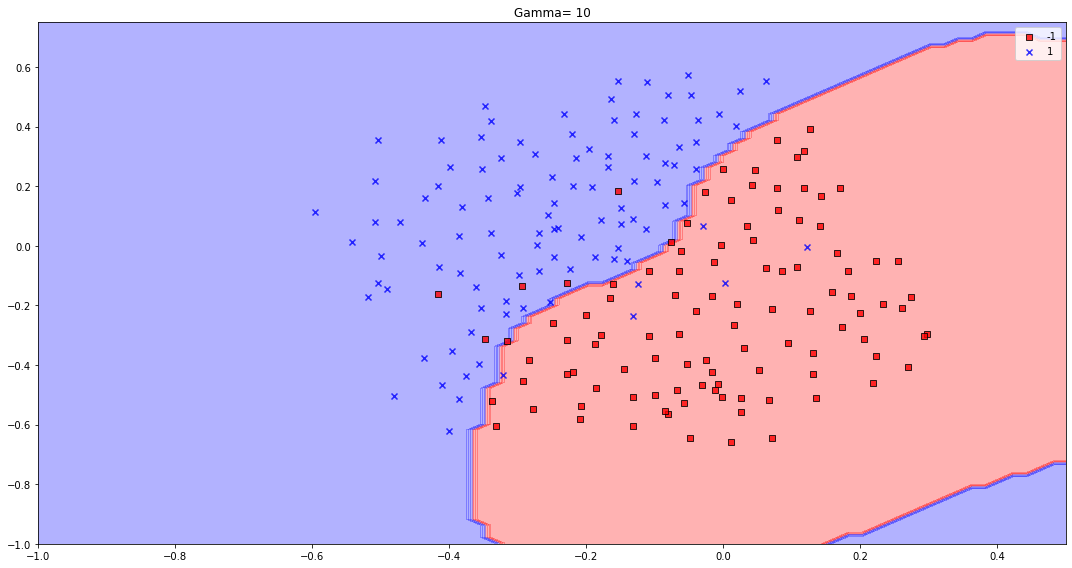

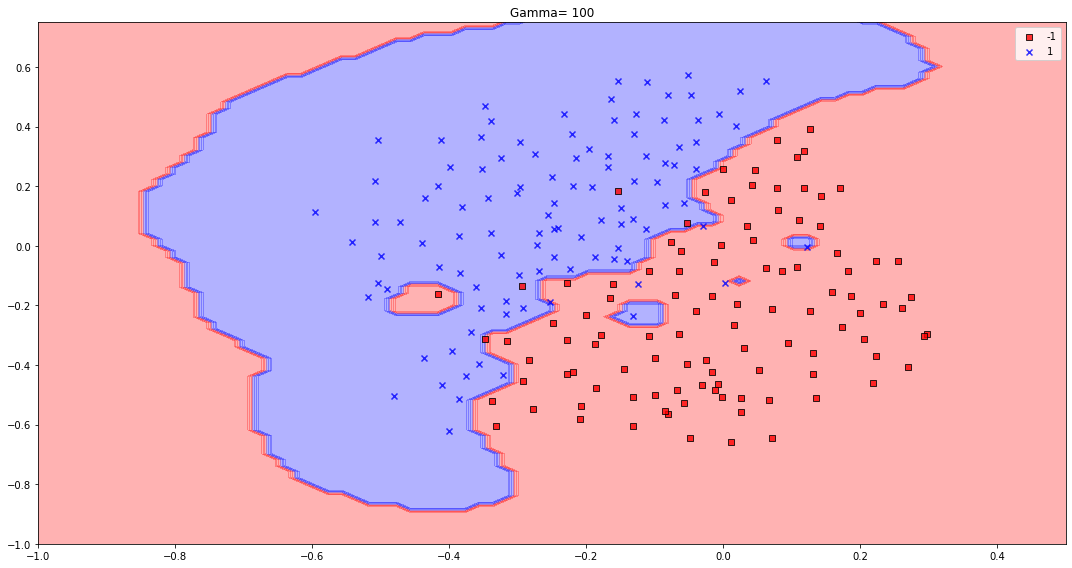

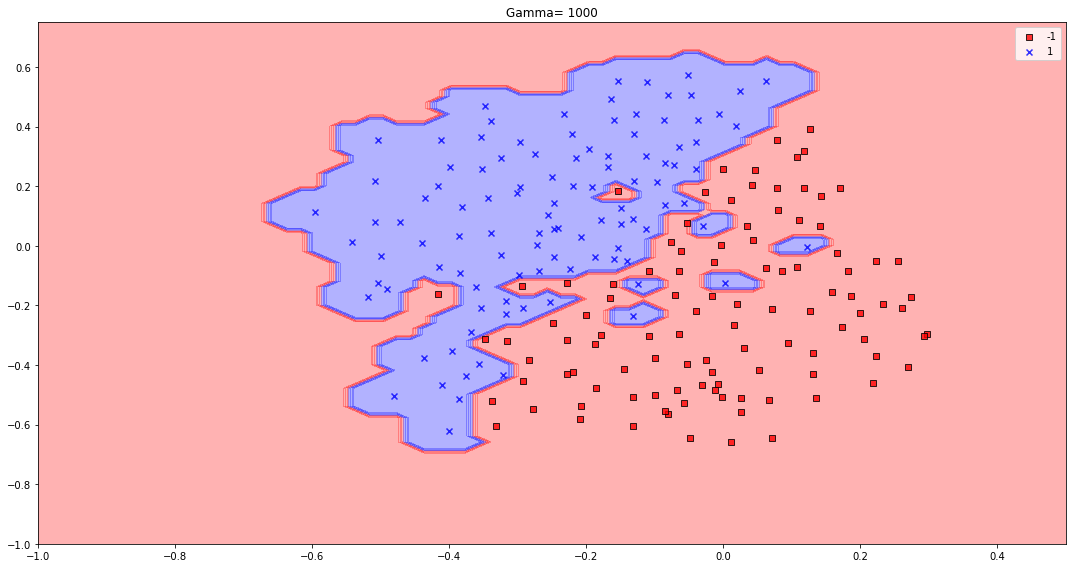

In [6]:
# plot and train data in different gamma
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10)
    svm.fit(np.array(data2[['x','y']]), np.array(data2['label']))
    plt.figure(figsize=(15,8))
    plot_decision_regions(np.array(data2[['x','y']]), np.array(data2['label']), classifier=svm)
    plt.title(f'Gamma= {gamma}')
    plt.xlim([-1, 0.5])
    plt.ylim([-1, 0.75])
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

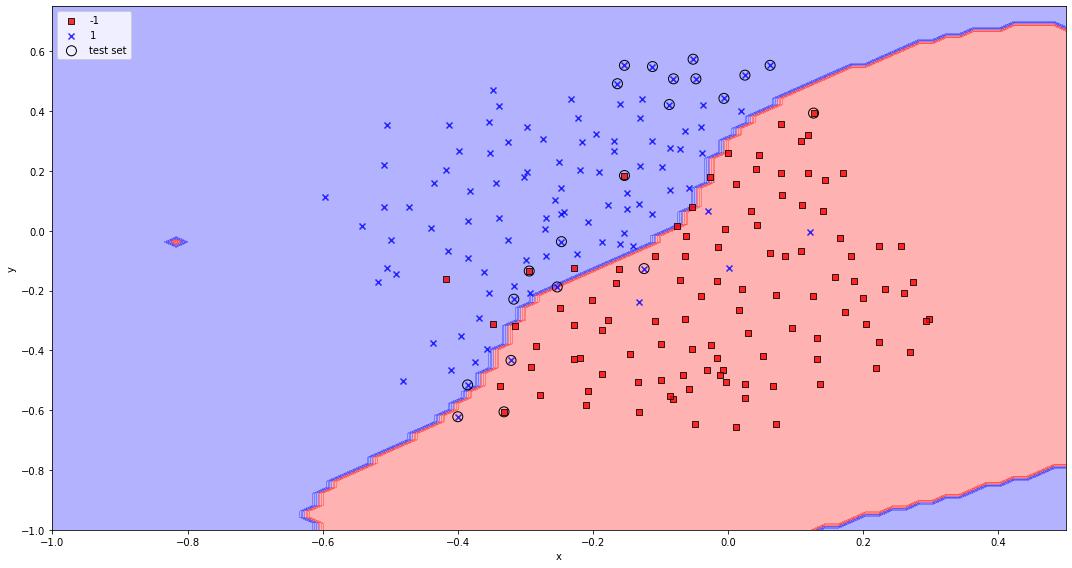

Gamma=0.1, Accuracy= 0.7142857142857143

Gamma=1, Accuracy= 0.7142857142857143

Gamma=10, Accuracy= 0.7142857142857143

Gamma=100, Accuracy= 0.6666666666666666

Gamma=1000, Accuracy= 0.3333333333333333



In [7]:
# Splitting data into 90% training and 10% test data:
X_train = np.array(data2[:189][['x','y']])
y_train = np.array(data2[:189]['label'])
svm = SVC(kernel='rbf', random_state=1, gamma=10, C=10)
svm.fit(X_train, y_train)

# draw testing and training data in the gragh
plt.figure(figsize=(15,8))
plot_decision_regions(np.array(data2[['x','y']]), np.array(data2['label']),
                      classifier=svm, test_idx=range(data2[190:].index[0], len(data2)))
plt.xlim([-1, 0.5])
plt.ylim([-1, 0.75])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# predict test data and get the accuracy
for gamma in [0.1,1,10,100,1000]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10)
    svm.fit(X_train, y_train)
    predicted  = svm.predict(data2[190:][['x','y']])
    # get the accuracy
    y_test = data2[190:]['label']
    print(f'Gamma={gamma}, Accuracy= {accuracy_score(y_test, predicted)}\n')